In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('../data/largest financial services companies by revenue.csv')
print(df.head())
print(df.info())

   Rank                     Company      Industry  Revenue in (USD Million)  \
0     1    Transamerica Corporation  Conglomerate                    245510   
1     2     Ping An Insurance Group     Insurance                    191509   
2     3                        ICBC       Banking                    182794   
3     4     China Construction Bank       Banking                    172000   
4     5  Agricultural Bank of China       Banking                    153884   

   Net Income in (USD Millions)  Total Assest in (USD Millions)   Headquarters  
0                         42521                             873  United States  
1                         20738                            1460          China  
2                         45783                            5110          China  
3                         39282                            4311          China  
4                         31293                            4169          China  
<class 'pandas.core.frame.DataFrame'>
R

In [93]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Rank                              0
Company                           0
Industry                          0
Revenue in (USD Million)          0
Net Income in (USD Millions)      0
Total Assest in (USD Millions)    0
Headquarters                      0
dtype: int64


In [94]:
#the total global revenue across all companies in 2024.
total_revenue = df["Revenue in (USD Million)"].sum()
print(f"Total Revenue in 2024: {total_revenue:,} USD Million")


Total Revenue in 2024: 4,271,756 USD Million


In [95]:
#the average revenue for each industry sector.
avg_revenue_by_industry = df.groupby("Industry")["Revenue in (USD Million)"].mean()
print(avg_revenue_by_industry)

Industry
Banking                 88008.700000
Conglomerate           245510.000000
Insurance               81346.565217
Investment Services     65850.166667
Name: Revenue in (USD Million), dtype: float64


In [96]:
#the top 10 companies with the highest total revenue.
top_companies_by_revenue = df.nlargest(10, "Revenue in (USD Million)")[["Company", "Revenue in (USD Million)"]]
print(top_companies_by_revenue)

                      Company  Revenue in (USD Million)
0    Transamerica Corporation                    245510
1     Ping An Insurance Group                    191509
2                        ICBC                    182794
3     China Construction Bank                    172000
4  Agricultural Bank of China                    153884
5        China Life Insurance                    144589
6                     Allianz                    136173
7               Bank of China                    134045
8             JP Morgan Chase                    129503
9                         AXA                    128011


In [97]:
#total assets by company headquarters (country-level aggregation).
total_assets_by_headquarters = df.groupby("Headquarters")["Total Assest in (USD Millions)"].sum()
print(total_assets_by_headquarters)


Headquarters
Canada             1527
China             26767
France             6428
Germany            1882
India              1292
Italy               667
Japan              4829
Spain              1845
Switzerland         439
United Kingdom     6117
United States     22230
Name: Total Assest in (USD Millions), dtype: int64


In [98]:
#the top 10 countries with the highest combined net income from companies headquartered there.
top_countries_by_net_income = df.groupby("Headquarters")["Net Income in (USD Millions)"].sum().nlargest(10)
print(top_countries_by_net_income)

Headquarters
China             230526
United States     153242
Japan              15413
United Kingdom     14878
France             14724
Germany             9901
Spain               9639
India               7972
Canada              6350
Switzerland         3834
Name: Net Income in (USD Millions), dtype: int64


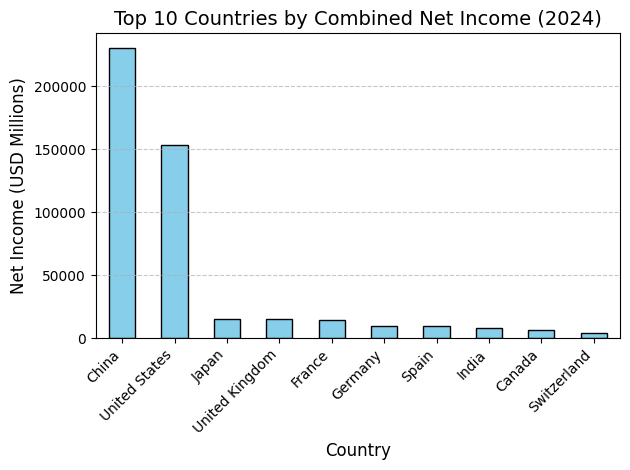

In [99]:
top_countries_by_net_income.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Countries by Combined Net Income (2024)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Net Income (USD Millions)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [100]:
#the average net income by industry.
industry_vs_net_income = df.groupby("Industry")["Net Income in (USD Millions)"].mean()
print(industry_vs_net_income)

Industry
Banking                14624.250000
Conglomerate           42521.000000
Insurance               4054.652174
Investment Services     6700.500000
Name: Net Income in (USD Millions), dtype: float64


In [101]:
#the number of companies operating in each industry.
industry_count = df["Industry"].value_counts()
print(industry_count)

Industry
Insurance              23
Banking                20
Investment Services     6
Conglomerate            1
Name: count, dtype: int64


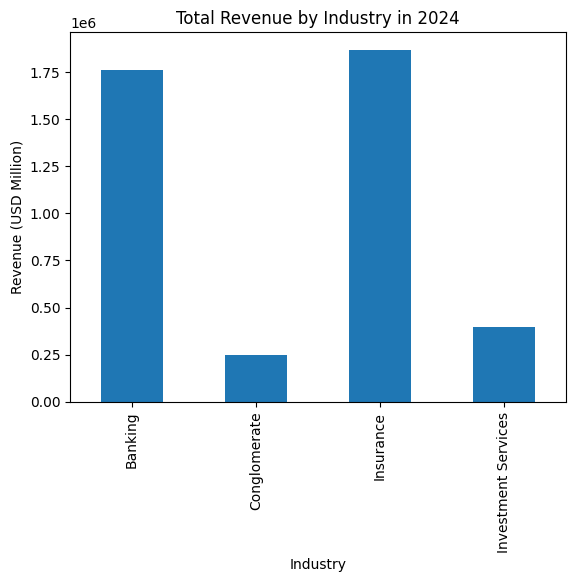

In [102]:
df.groupby("Industry")["Revenue in (USD Million)"].sum().plot(kind="bar")
plt.title("Total Revenue by Industry in 2024")
plt.xlabel("Industry")
plt.ylabel("Revenue (USD Million)")
plt.show()

In [103]:
#the average assets held by companies based on their country of headquarters.
avg_assets_by_headquarters = df.groupby("Headquarters")["Total Assest in (USD Millions)"].mean()
print(avg_assets_by_headquarters.head())

Headquarters
Canada      509.000000
China      1911.928571
France     2142.666667
Germany     627.333333
India       646.000000
Name: Total Assest in (USD Millions), dtype: float64


In [104]:
#the top 5 companies with the highest total assets.
top_companies_by_assets = df.nlargest(5, "Total Assest in (USD Millions)")[["Company", "Total Assest in (USD Millions)"]]
print(top_companies_by_assets)

                       Company  Total Assest in (USD Millions)
2                         ICBC                            5110
3      China Construction Bank                            4311
4   Agricultural Bank of China                            4169
10                  Fannie Mae                            3985
7                Bank of China                            3739


In [105]:
#the total revenue comes from companies based in China.
china_revenue = df[df["Headquarters"] == "China"]["Revenue in (USD Million)"].sum() / df["Revenue in (USD Million)"].sum() * 100
print(f"Percentage of Revenue from China: {china_revenue:.2f}%")

Percentage of Revenue from China: 34.12%


In [106]:
#how revenue varies depending on the location of a company's headquarters.
hq_vs_revenue = df.groupby("Headquarters")["Revenue in (USD Million)"].mean()
print(hq_vs_revenue.head())

Headquarters
Canada      56591.666667
China      104122.142857
France      97533.666667
Germany     85678.333333
India       77385.000000
Name: Revenue in (USD Million), dtype: float64


In [107]:
#Average net income per industry to compare financial performance across sectors.
avg_net_income_by_industry = df.groupby("Industry")["Net Income in (USD Millions)"].mean()
print(avg_net_income_by_industry)

Industry
Banking                14624.250000
Conglomerate           42521.000000
Insurance               4054.652174
Investment Services     6700.500000
Name: Net Income in (USD Millions), dtype: float64


In [108]:
#how many companies have revenue greater than $100 billion.
high_revenue_count = len(df[df["Revenue in (USD Million)"] > 100000])
print(f"Companies with Revenue > 100,000M USD: {high_revenue_count}")

Companies with Revenue > 100,000M USD: 12


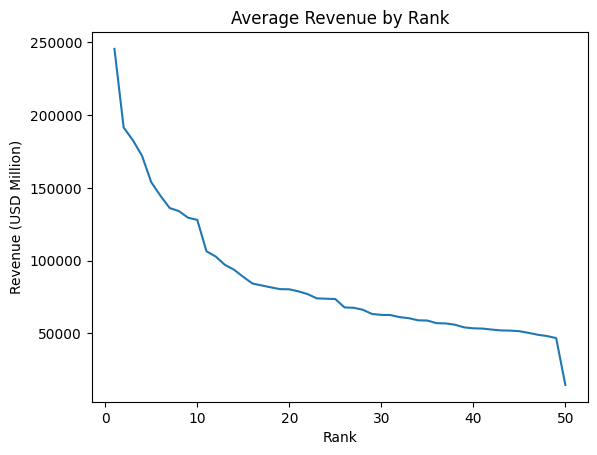

In [109]:
df.groupby("Rank")["Revenue in (USD Million)"].mean().plot(kind="line")
plt.title("Average Revenue by Rank")
plt.ylabel("Revenue (USD Million)")
plt.show()

In [110]:
#how different industries perform in terms of total assets among US-based companies.
us_industry_vs_assets = df[df["Headquarters"] == "United States"].groupby("Industry")["Total Assest in (USD Millions)"].mean()
print(us_industry_vs_assets)

Industry
Banking                2605.0
Conglomerate            873.0
Insurance               678.0
Investment Services    1780.6
Name: Total Assest in (USD Millions), dtype: float64


In [111]:
#top 5 Chinese companies with the highest net income.
top_china_by_net_income = df[df["Headquarters"] == "China"].nlargest(5, "Net Income in (USD Millions)")[["Company", "Net Income in (USD Millions)"]]
print(top_china_by_net_income)

                      Company  Net Income in (USD Millions)
2                        ICBC                         45783
3     China Construction Bank                         39282
4  Agricultural Bank of China                         31293
7               Bank of China                         27952
1     Ping An Insurance Group                         20738


In [112]:
#Total revenue distribution by country of company headquarters.
revenue_by_hq = df.groupby("Headquarters")["Revenue in (USD Million)"].sum()
print(revenue_by_hq.head())

Headquarters
Canada      169775
China      1457710
France      292601
Germany     257035
India       154770
Name: Revenue in (USD Million), dtype: int64


In [113]:
#average revenue for companies headquartered in major European countries.
europe_revenue = df[df["Headquarters"].isin(["France", "Germany", "UK"])]["Revenue in (USD Million)"].mean()
print(f"Average Revenue in Europe: {europe_revenue:.2f} USD Million")

Average Revenue in Europe: 91606.00 USD Million


In [114]:
#average net income in Asia by industry sector.
asia_net_income = df[df["Headquarters"].isin(["China", "Japan", "India"])].groupby("Industry")["Net Income in (USD Millions)"].mean()
print(asia_net_income)

Industry
Banking      18476.636364
Insurance     5629.777778
Name: Net Income in (USD Millions), dtype: float64


In [115]:
#Count how many companies have assets exceeding $4 billion.
high_assets_count = len(df[df["Total Assest in (USD Millions)"] > 4000])
print(f"Companies with Assets > 4000M USD: {high_assets_count}")

Companies with Assets > 4000M USD: 3


In [116]:
#what percentage of companies belong to the Insurance industry.
insurance_pct = len(df[df["Industry"] == "Insurance"]) / len(df) * 100
print(f"Percentage of Insurance Companies: {insurance_pct:.2f}%")

Percentage of Insurance Companies: 46.00%


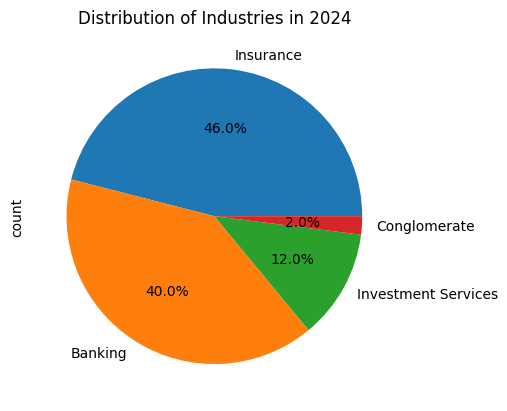

In [117]:
df["Industry"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Industries in 2024")
plt.show()

In [118]:
#how company rank correlates with total assets.
rank_vs_assets = df.groupby("Rank")["Total Assest in (USD Millions)"].mean()
print(rank_vs_assets.head())

Rank
1     873.0
2    1460.0
3    5110.0
4    4311.0
5    4169.0
Name: Total Assest in (USD Millions), dtype: float64


In [119]:
#total revenue from companies in the "Conglomerate" industry.
conglomerate_revenue = df[df["Industry"] == "Conglomerate"]["Revenue in (USD Million)"].sum()
print(f"Total Revenue for Conglomerates: {conglomerate_revenue:,} USD Million")

Total Revenue for Conglomerates: 245,510 USD Million


In [120]:
#top 5 countries with the highest combined total assets.
top_countries_by_assets = df.groupby("Headquarters")["Total Assest in (USD Millions)"].sum().nlargest(5)
print(top_countries_by_assets)

Headquarters
China             26767
United States     22230
France             6428
United Kingdom     6117
Japan              4829
Name: Total Assest in (USD Millions), dtype: int64


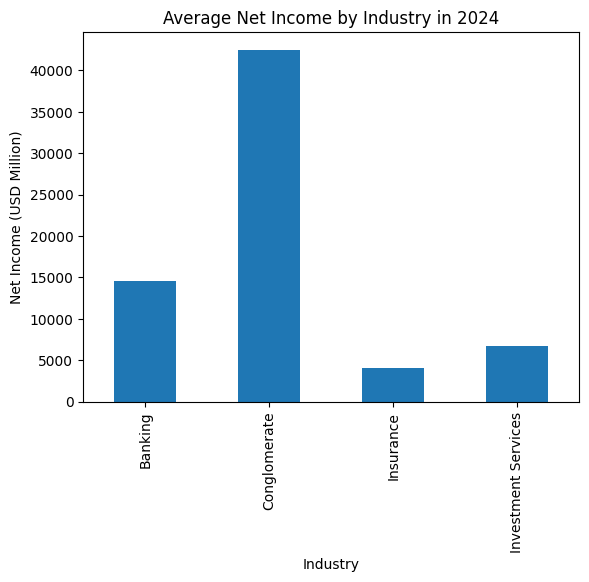

In [121]:
df.groupby("Industry")["Net Income in (USD Millions)"].mean().plot(kind="bar")
plt.title("Average Net Income by Industry in 2024")
plt.ylabel("Net Income (USD Million)")
plt.show()

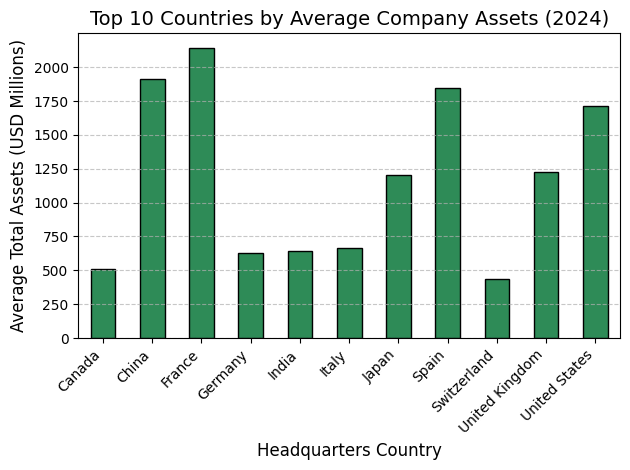

In [122]:
avg_assets_by_headquarters.plot(kind="bar", color="seagreen", edgecolor="black")
plt.title("Top 10 Countries by Average Company Assets (2024)", fontsize=14)
plt.xlabel("Headquarters Country", fontsize=12)
plt.ylabel("Average Total Assets (USD Millions)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

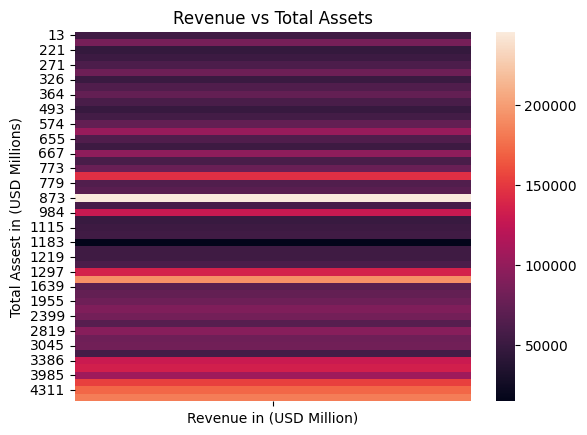

In [123]:
pivot = df.pivot_table(values="Revenue in (USD Million)", index="Total Assest in (USD Millions)", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Revenue vs Total Assets")
plt.show()